#Research Update 7/6/2015

##### Spencer Everett, SLAC 2015

First import the necessary code modules.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Utilities:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
from pangloss import *

## Convergence maps
Let's create a new `Kappamap` object `K` for a test file located in a data directory created in the local clone of the `Pangloss` repository. Note that as it is not a FITS file, the optional parameter is set to `False`.

In [4]:
K = Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

`Kappamap` is now a subclass of `WLMap` (weak-lensing map), which contains most of the methods used in the previous version of `Kappamap`. As the file is not a fits file, the following parameters are automatically set:

Field Size (`self.field`): 4 deg x 4 deg  

Number of Pixels (`self.NX`*`self.NX`): 4096 x 4096

Pixel-scale (`self.PIXSCALE`): 4 deg / 4096 = 0.000977 deg/pix

Output (`self.output`): `'data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa.fits'`

As part of the constructor, the .kappa file is also converted and saved as a .fits file in the same directory.
Convergence values in the kappa-map are obtained using the `at()` method:

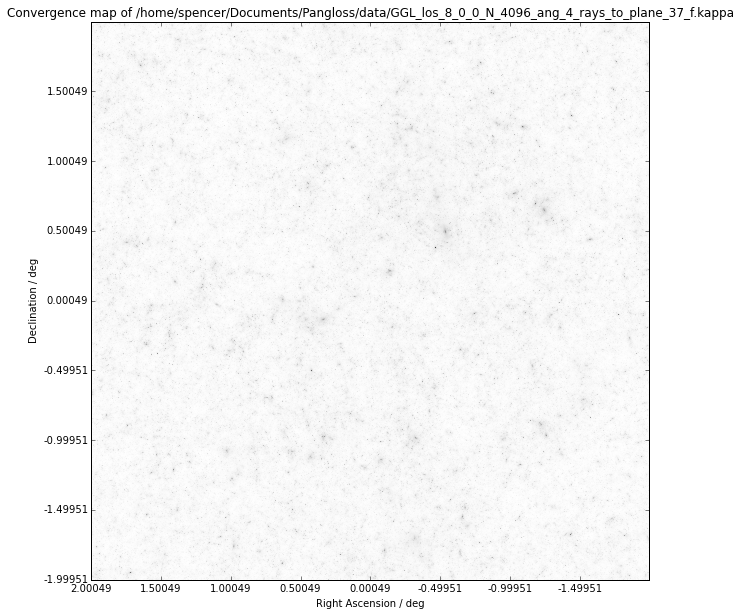

In [7]:
K.plot()

Note that a negative right ascension convention is use instead of wrapping around to 360 deg. The size of the plot can be changed using the first optional argument `fig_size`, where the value is in inches. The default size is 10 in.

The plot method can also be used to graph a subplot. Simply add a list parameter of the form:

    subplot = [x_initial,x_final,y_initial,y_final]

where each of the subplot limits are in world coordinates:

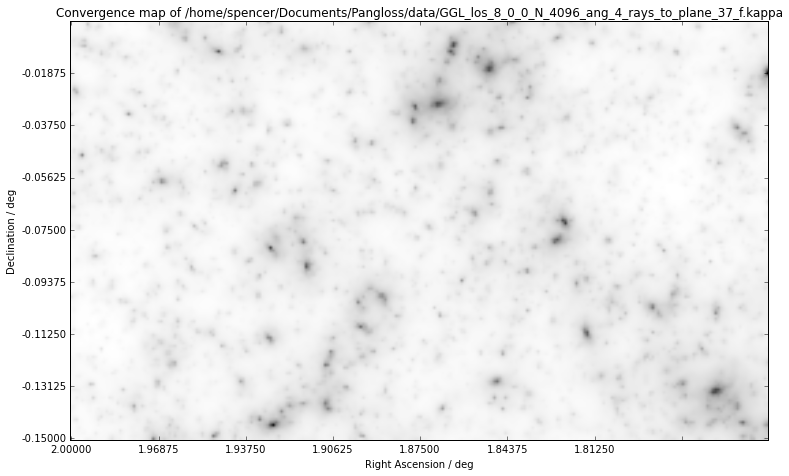

In [29]:
K.plot(12.5,[2,1.75,-.15,0])

## Shear maps
We can also create a `Shearmap` object. Like `Kappamap`, the `Shearmap` class is a subclass of `WLMap` but requires two file inputs; one file for each component of the complex shear. The files $\textit{must}$ be passed in a list (unlike `Kappamap` files, which are automatically converted) and must be in order (first the .gamma1 file, then the .gamma2 file). As before, the optional second argument is set to `FITS = False` as the file has yet to be converted to FITS format.

In [13]:
S = Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

A `Shearmap` object is currently two separate maps: gamma1 and gamma2. Each map attribute is now stored as a list, with the first and second entry corresponding to gamma1 and gamma2. (We could maybe change this - do we really need two versions of the same data?) For example, 

If the files have `.gamma1` and `.gamma2` extensions, the attributes are set automatically in `WLMap`. A few of the important attributes set for the maps are:

Field Size (`self.field`): 4 deg x 4 deg  

Number of Pixels (`self.NX`*`self.NX`): 4096 x 4096

Pixel-scale (`self.PIXSCALE`): 4 deg / 4096 = 0.000977 deg/pix

Output (`self.output`): `['data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma1.fits',
'data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma1.fits']`

The `at()` method works similarly for a `Shearmap`, but a third argument now specifies which map (`gamma1` or `gamma2`) the method will extract from.

The `plot()` method for a `Shearmap` is quite different. (Explain details and small derivation of complex gamma, etc).

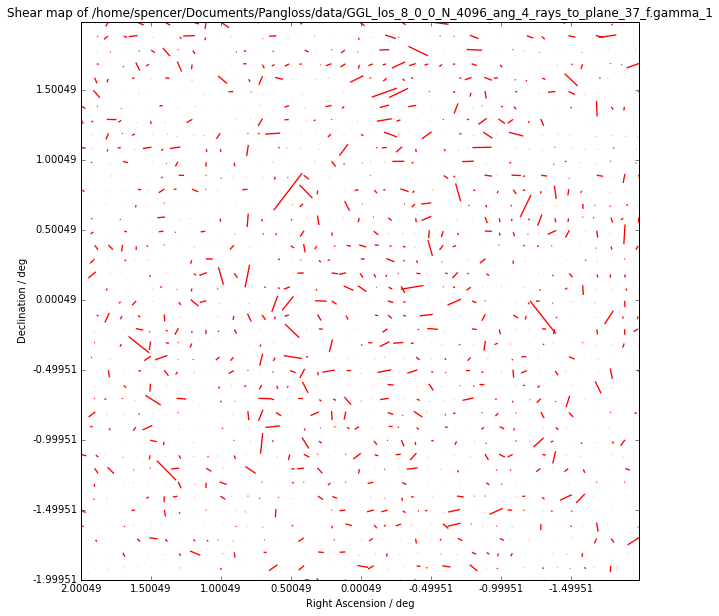

In [19]:
S.plot()

Resizing the image is the same as with `Kappamap`, simply pass one argument with the desired figure size in inches.

Subplots also work with `Shearmaps`. Note that the shear stick sampling for the subplot is adjusted so that the shear stick density remains the same regardless of size (40 sticks per axis).

When the subplot is not square, the sampling of shear sticks is held constant rather than the number of sticks so that the image is not distorted.

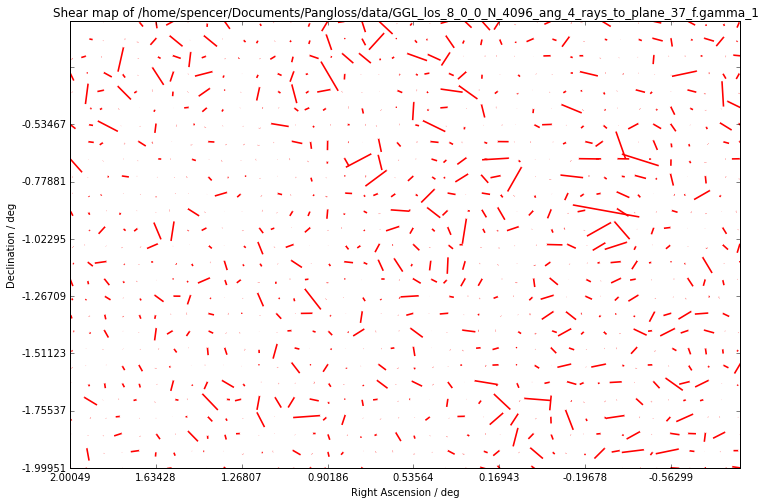

In [43]:
S.plot(12,[0,3000,0,2000],'pixel')

## Overlaying shear and convergence

The plotting methods simply use the current axes, allowing simple overlays to be made:   

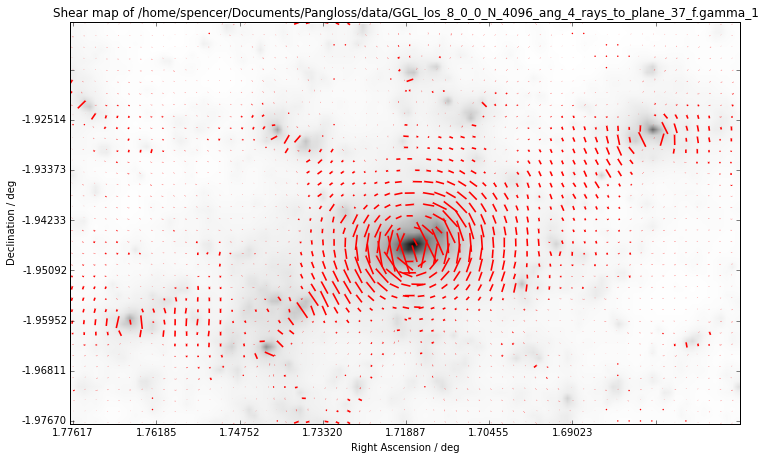

In [41]:
K.plot(12,[-.031,-.029,-.0345,-.0333],coords='physical')
S.plot(12,[-.031,-.029,-.0345,-.0333],coords='physical')

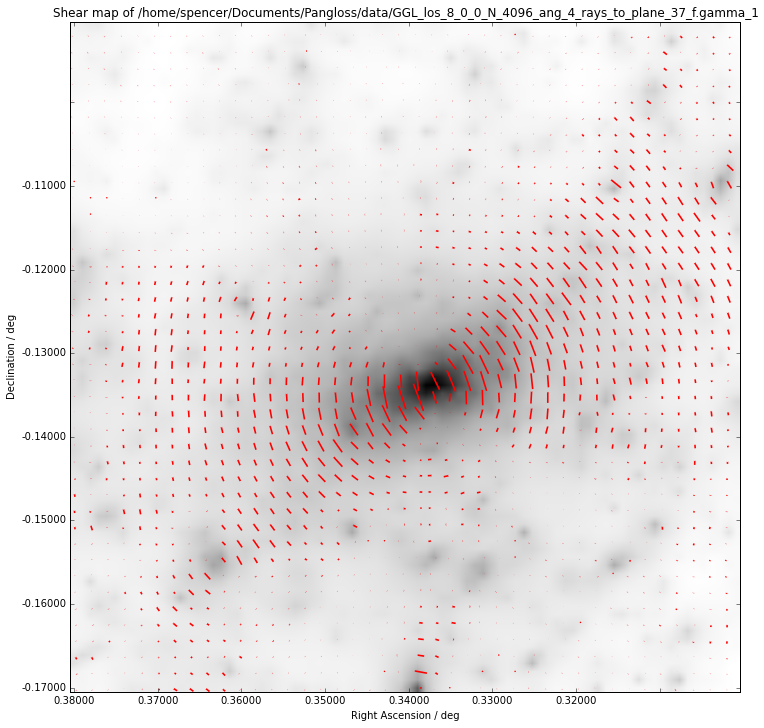

In [42]:
K.plot(12,[0.38,0.3,-0.17,-0.09])
S.plot(12,[0.38,0.3,-0.17,-0.09])

## Foreground Galaxy Catalogs

In [46]:
config = Configuration(PANGLOSS_DIR+'/example/example.config')
f = ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

In [52]:
mag_cutoff = 21.5
nra = -np.rad2deg(f.data['nRA'][f.data['mag']<mag_cutoff])
dec = np.rad2deg(f.data['Dec'][f.data['mag']<mag_cutoff])

pix_nra = [K.world2image(a,0)[0] for a in nra]
pix_dec = [K.world2image(0,d)[1] for d in dec]

mags = f.data['mag'][f.data['mag']<mag_cutoff]
size = [500/i for i in mags]

Each convergence/shear map has 16 galaxy catalogs contained within them, each one having ~300,000 unique galaxies. Each catalog covers 1 square degree.

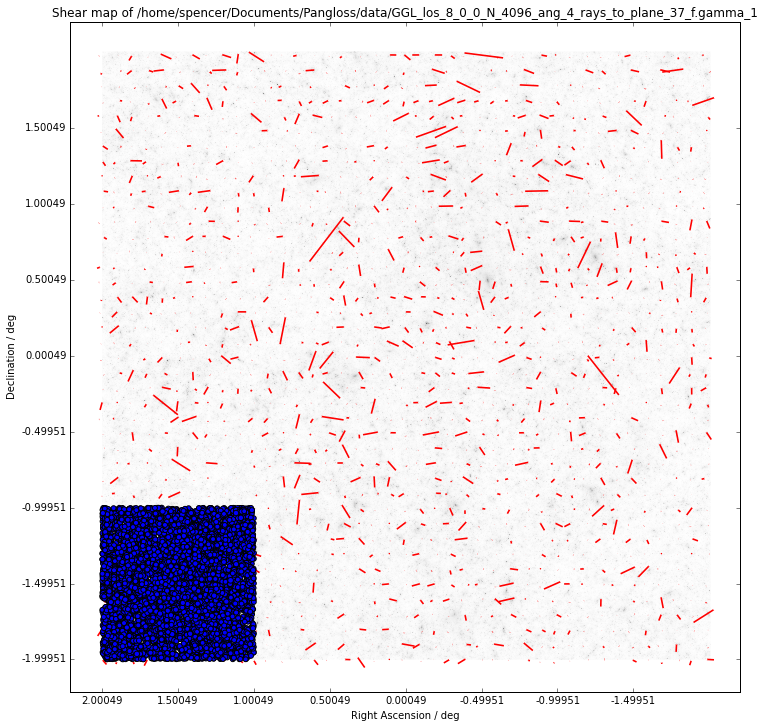

In [53]:
K.plot(12)
S.plot(12)
plt.scatter(pix_nra,pix_dec,s=size)

The `plotCatalogOnMap()` method in `plot.py` can be used to plot a galaxy catalog on top of its corresponding convergence and shear map. Optional inputs allow for a variable figure size and subplot, as well as cutoffs for galaxy magnitudes, mass, and redshift.

Below are plotted the most massive galaxies in the (0,0) catalog who have redshift below z = 1.3857.

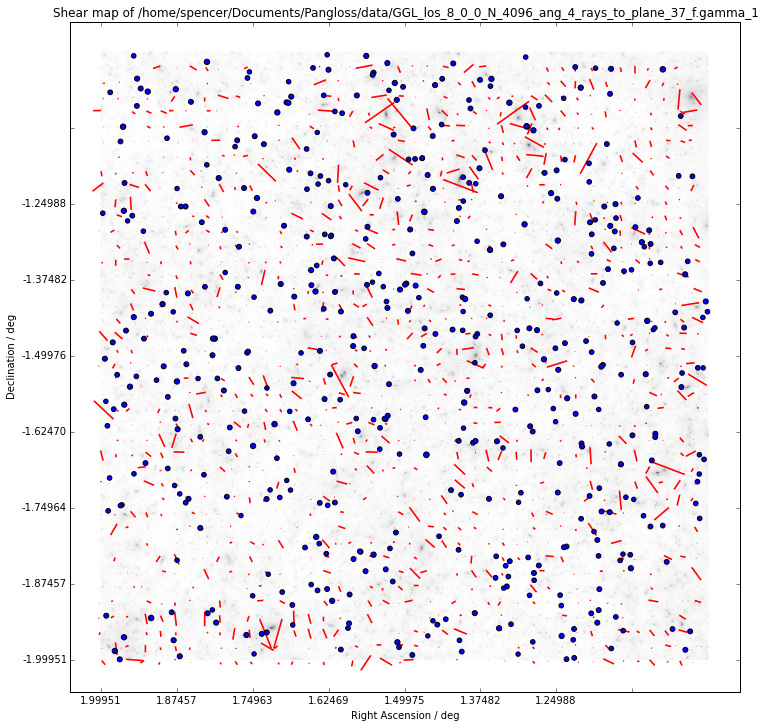

In [68]:
mag_cutoff = [0,26]
mass_cutoff = [10**10.9,10**20]
z_cutoff = [0,1.3857]

plot.plotCatalogOnMap(f,12,None,mag_cutoff,mass_cutoff,z_cutoff)

The overlay subplotting does not quite work yet, so we need it to check if the most massive galaxies are indeed aligned with the larges convergence and shear values.

## Generated Background Catalogs

Have yet to create a `BackgroundCatalog` class yet, but here is a prototype. It contains `N`-generated galaxies with values contained in the inputted magnitude, mass, and redshift cutoffs. All quantities are uniformly distributed for now, but this will later be changed for mags, masses, and redshifts (we might not even need mags or masses for background sources, maybe just intrinsic shapes).

In [71]:
config = Configuration(PANGLOSS_DIR+'/example/example.config')
g = Catalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

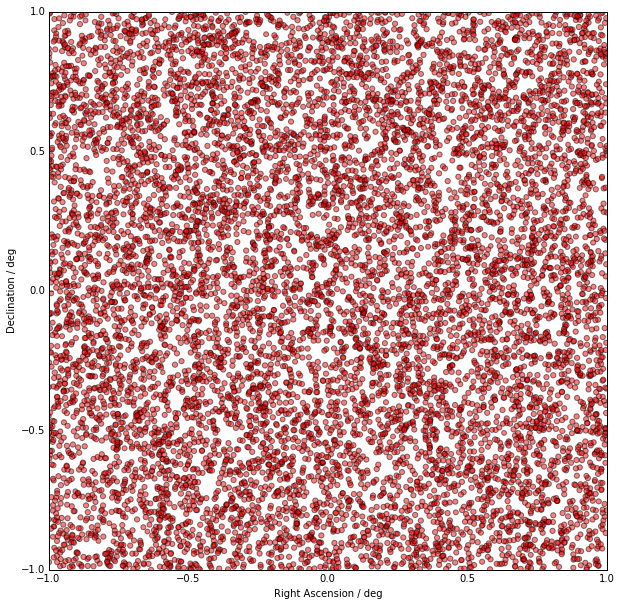

In [73]:
domain = None
N = 10000
mag_cut = [24,0]
mass_cut = [10**5,10**12]
z_cut = [0,1.3857]
plot = True
g.generate(domain,N,mag_cut,mass_cut,z_cut,plot)

### More to come!!